In [1]:
pip install "numpy<2"

Note: you may need to restart the kernel to use updated packages.


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**<font size="6">1. Data Loading & Cleaning </font>**

In [27]:
Df=pd.read_excel(r"C:\Users\Arnav\Desktop\Caselytics_HexaMartCase.xlsx")
Df

,Customer ID,Quantity,Order ID,Region,Customer Type,Payment Method,Date of Order,City,Product Line,Unit Price,Total Sales,Profit
0,40333,38,SCHE-867,South India,Pro,Credit Card,2015-11-29,Chennai,Home Décor,9361,355718,38096.53
1,18111,41,NDEL-5690,North India,Pro,Net Banking,2016-11-12,Delhi,Education,7987,327467,-13472.70
2,37699,1,WPAN-3389,West India,Regular,Net Banking,2015-01-08,Panaji,Kitchen Appliances,8753,8753,842.56
3,36722,24,ERAN-8249,East India,Regular,Net Banking,2017-01-01,Ranchi,Skincare,4424,106176,13178.41
4,21943,18,NDEH-1618,North India,Regular,Credit Card,2018-04-23,Dehradun,Education,5048,90864,-1659.36
...,...,...,...,...,...,...,...,...,...,...,...,...
3903,38381,23,NDEH-372,North India,Pro,Net Banking,2016-02-23,Dehradun,Sports,3353,77119,-3072.50
3904,12547,12,WPAN-1146,West India,Regular,Net Banking,2019-04-08,Panaji,Home Décor,562,6744,374.57
3905,14354,20,EPAT-2214,East India,Trial,Credit Card,2017-09-09,Patna,Food and Beverages,7579,151580,964.02
3906,45316,8,EPAT-9109,East India,Trial,Credit Card,2015-03-21,Patna,Education,7987,63896,3380.48


In [28]:
Df = Df.drop(columns=['Customer ID', 'Order ID'])

In [29]:
def data_overview(Df):
    print("\nData Overview:")
    print(Df.info())
    print("\nMissing Values:")
    print(Df.isnull().sum())
    print("\nSummary Statistics:")
    print(Df.describe())

data_overview(Df)


Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3908 entries, 0 to 3907
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Quantity        3908 non-null   int64         
 1   Region          3908 non-null   object        
 2   Customer Type   3908 non-null   object        
 3   Payment Method  3908 non-null   object        
 4   Date of Order   3908 non-null   datetime64[ns]
 5   City            3908 non-null   object        
 6   Product Line    3908 non-null   object        
 7   Unit Price      3908 non-null   int64         
 8   Total Sales     3908 non-null   int64         
 9   Profit          3908 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 305.4+ KB
None

Missing Values:
Quantity          0
Region            0
Customer Type     0
Payment Method    0
Date of Order     0
City              0
Product Line      0
Unit Pri

In [30]:
Df['Date of Order'] = pd.to_datetime(Df['Date of Order'], errors='coerce')

**<font size="6">2. Exploratory Data Analysis (EDA) </font>**

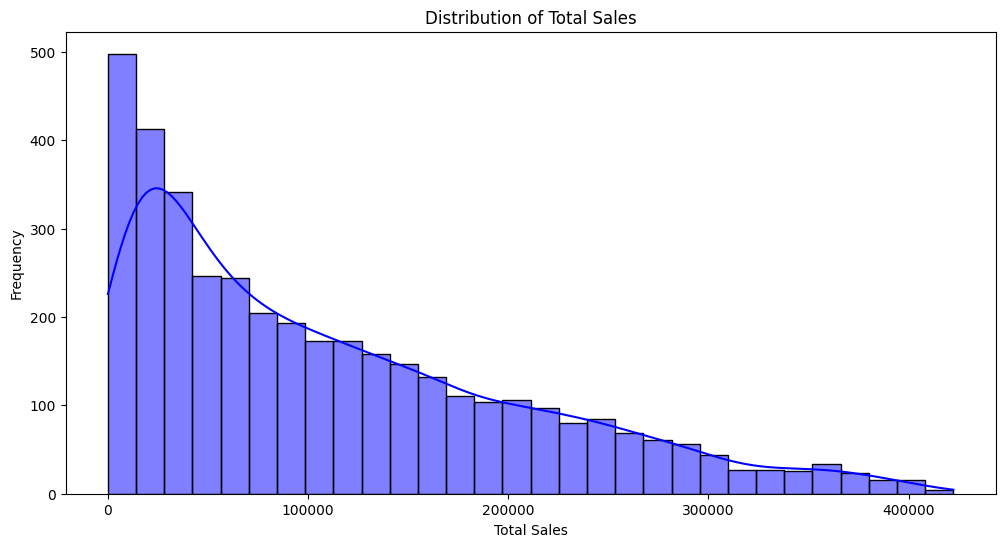

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(Df['Total Sales'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

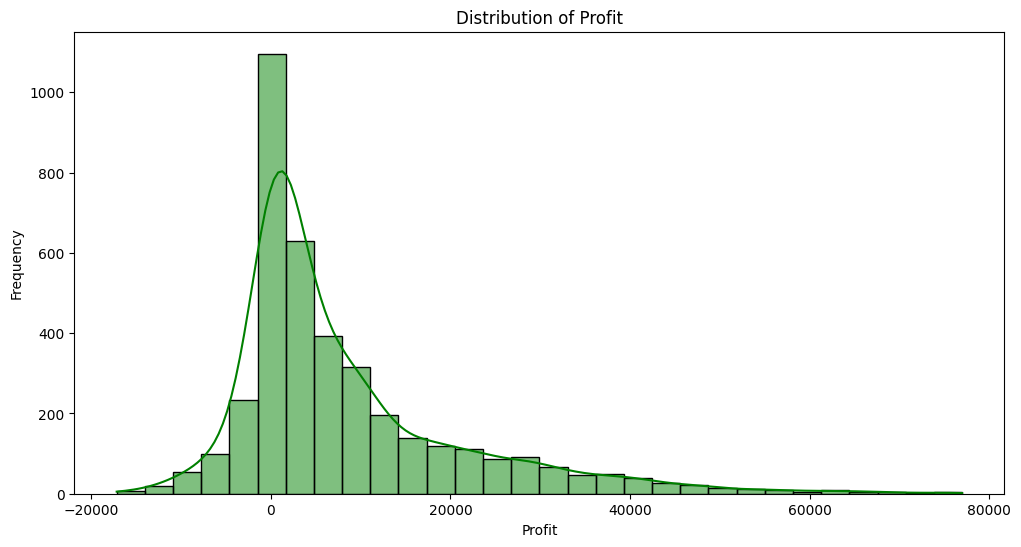

In [32]:
plt.figure(figsize=(12, 6))
sns.histplot(Df['Profit'], bins=30, kde=True, color='green')
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_7028\743347134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Total Sales', data=Df, palette='coolwarm', estimator=np.sum)


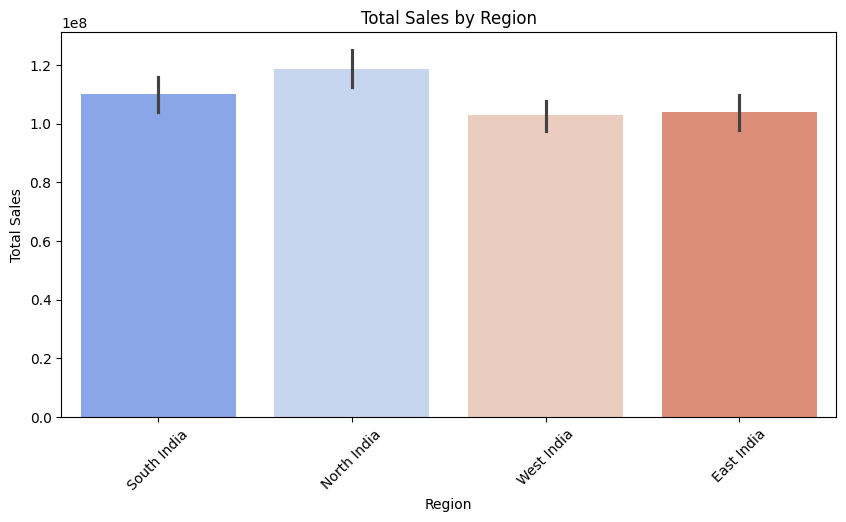

In [33]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Total Sales', data=Df, palette='coolwarm', estimator=np.sum)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_7028\213900637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Line', y='Profit', data=Df, palette='magma', estimator=np.sum)


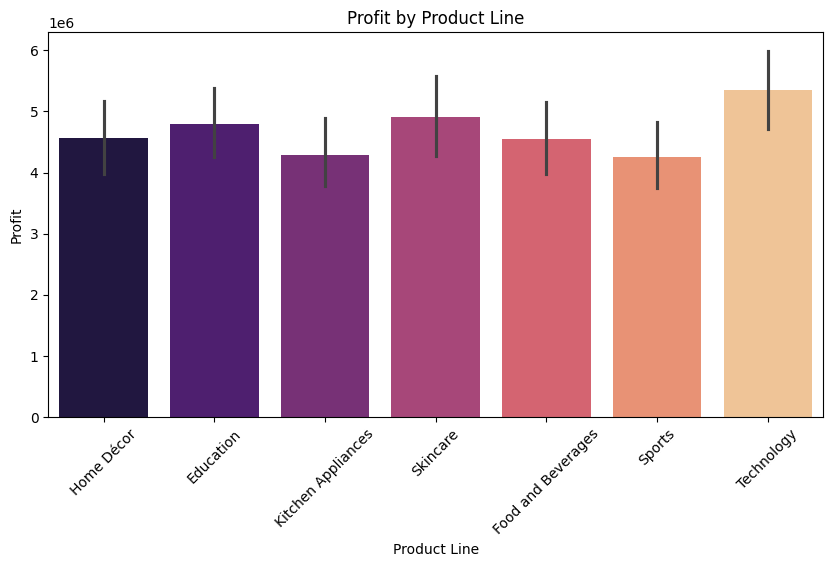

In [34]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Product Line', y='Profit', data=Df, palette='magma', estimator=np.sum)
plt.title('Profit by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

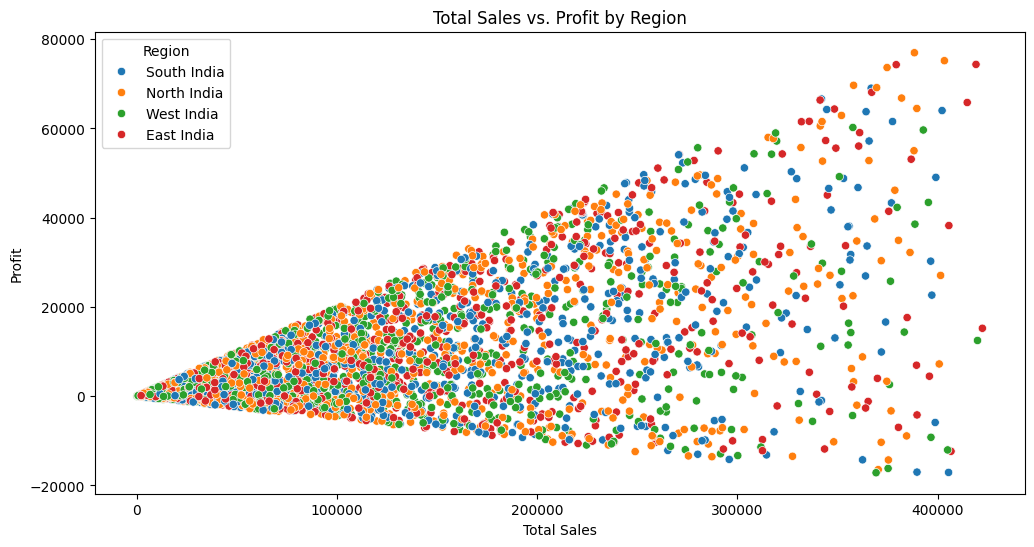

In [35]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total Sales', y='Profit', hue='Region', data=Df)
plt.title('Total Sales vs. Profit by Region')
plt.xlabel('Total Sales')
plt.ylabel('Profit')
plt.show()

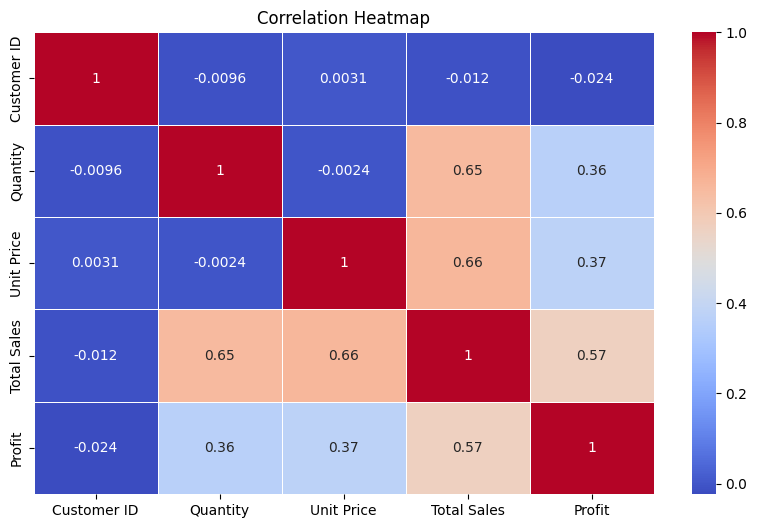

In [37]:
#Correlation Heatmap
numeric_cols = Df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**<font size="6">3. Regional Performance Analysis </font>**

In [38]:
regional_performance = Df.groupby("Region").agg(
    Total_Sales=("Total Sales", "sum"),
    Total_Profit=("Profit", "sum"),
    Avg_Profit_Per_Order=("Profit", "mean"),
    Order_Count=("Region", "count")
).reset_index()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_7028\4245567876.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Total_Sales', data=regional_performance, palette='viridis')


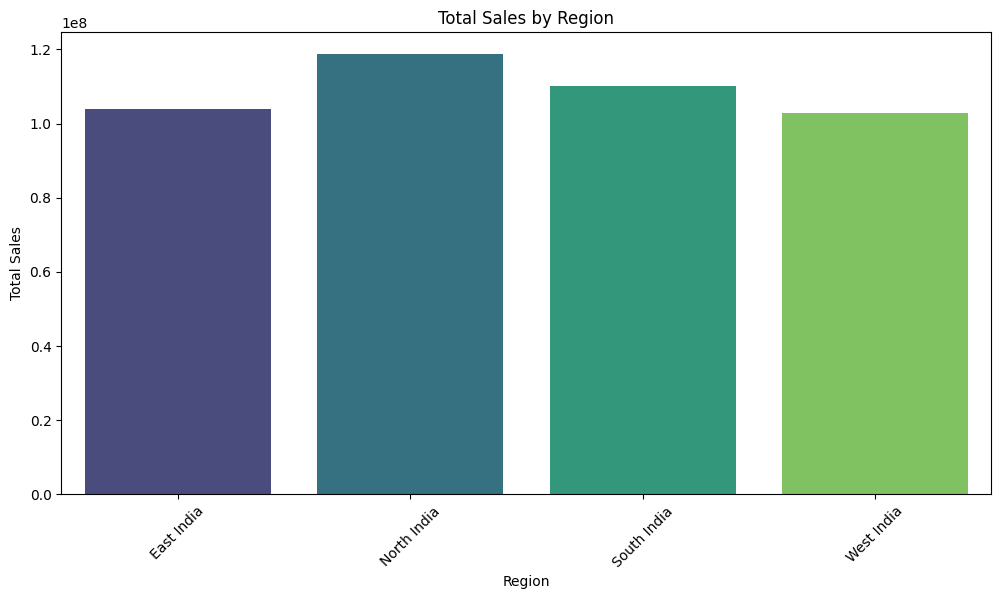

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Total_Sales', data=regional_performance, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_7028\2144367716.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Total_Profit', data=regional_performance, palette='plasma')


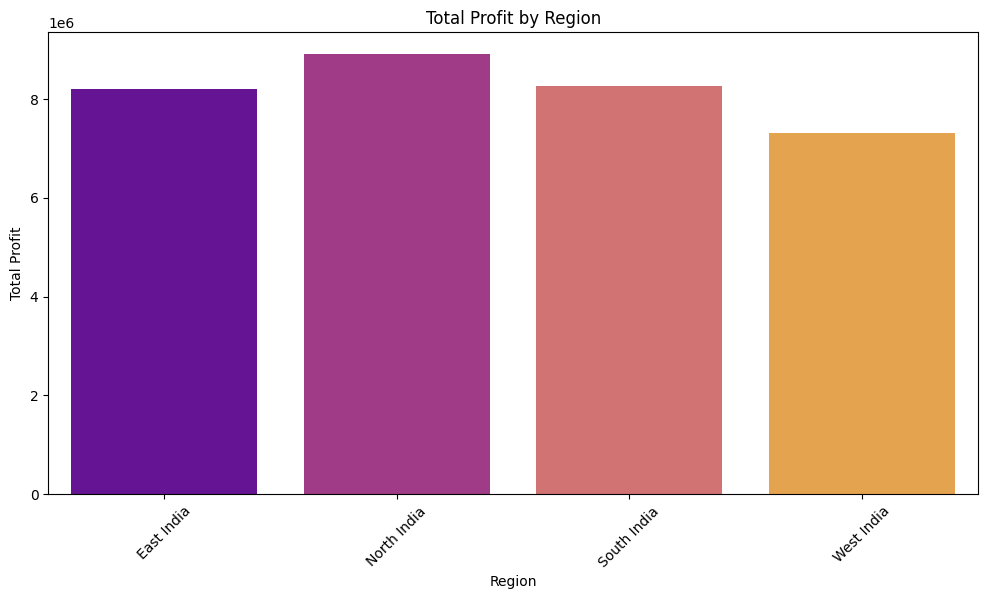

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Total_Profit', data=regional_performance, palette='plasma')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_7028\3138870897.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Avg_Profit_Per_Order', data=regional_performance, palette='coolwarm')


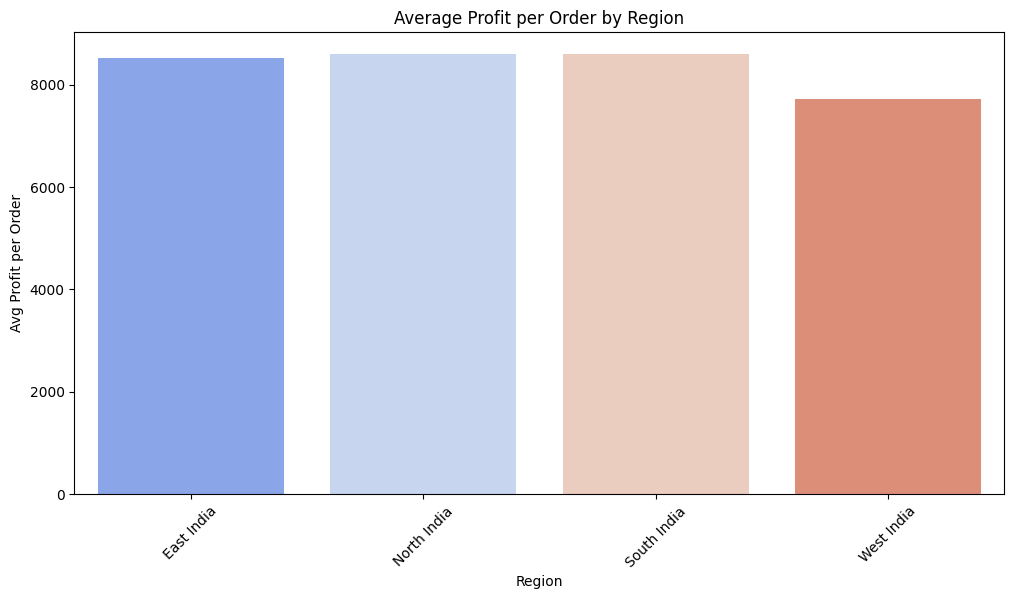

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Avg_Profit_Per_Order', data=regional_performance, palette='coolwarm')
plt.title('Average Profit per Order by Region')
plt.xlabel('Region')
plt.ylabel('Avg Profit per Order')
plt.xticks(rotation=45)
plt.show()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_7028\3953616252.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Order_Count', data=regional_performance, palette='cividis')


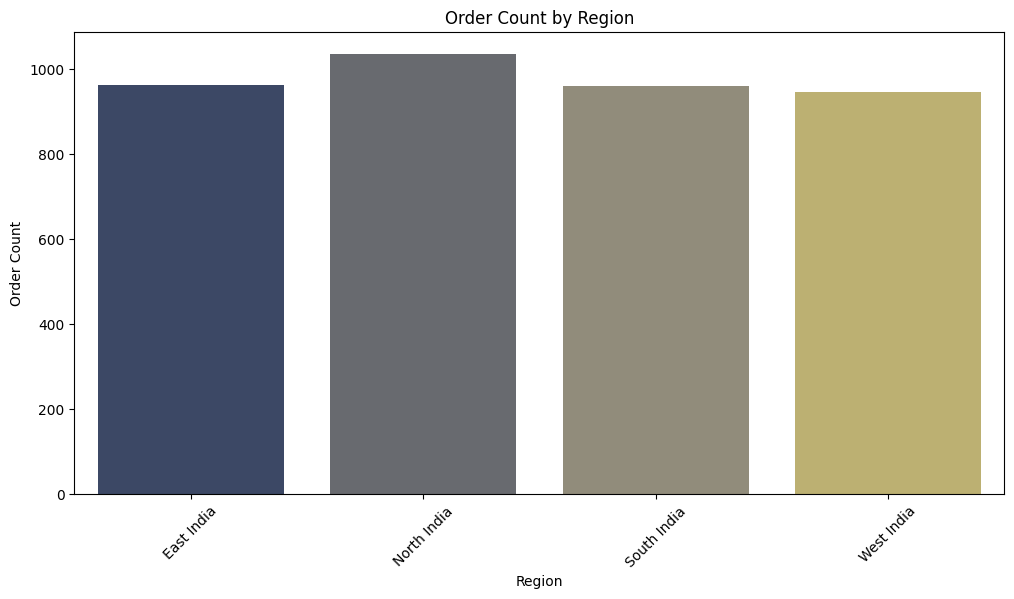

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Order_Count', data=regional_performance, palette='cividis')
plt.title('Order Count by Region')
plt.xlabel('Region')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.show()

In [45]:
print(regional_performance)

        Region  Total_Sales  Total_Profit  Avg_Profit_Per_Order  Order_Count
0   East India    103860452    8211613.66           8518.271432          964
1  North India    118717232    8908385.40           8598.827606         1036
2  South India    110171278    8259954.79           8595.166275          961
3   West India    102841741    7305641.32           7714.510370          947


**<font size="6">4. Product Portfolio Analysis </font>**

In [46]:
product_performance = Df.groupby("Product Line").agg(
    Total_Sales=("Total Sales", "sum"),
    Total_Profit=("Profit", "sum"),
    Avg_Profit_Per_Order=("Profit", "mean"),
    Order_Count=("Product Line", "count")
).reset_index()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_7028\1535866520.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Line', y='Total_Sales', data=product_performance, palette='viridis')


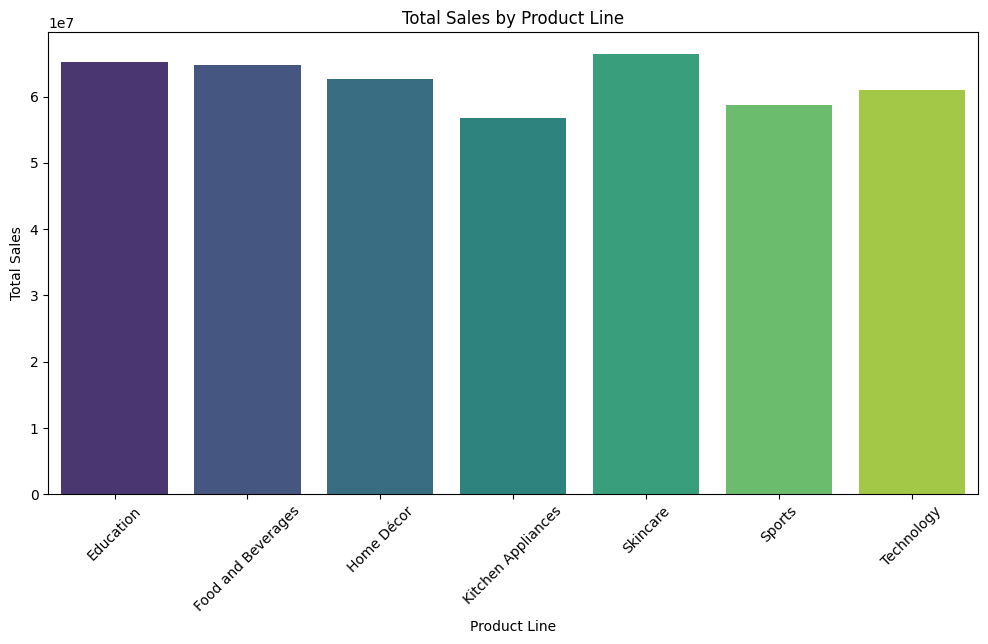

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Line', y='Total_Sales', data=product_performance, palette='viridis')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_7028\3644509394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Line', y='Total_Profit', data=product_performance, palette='plasma')


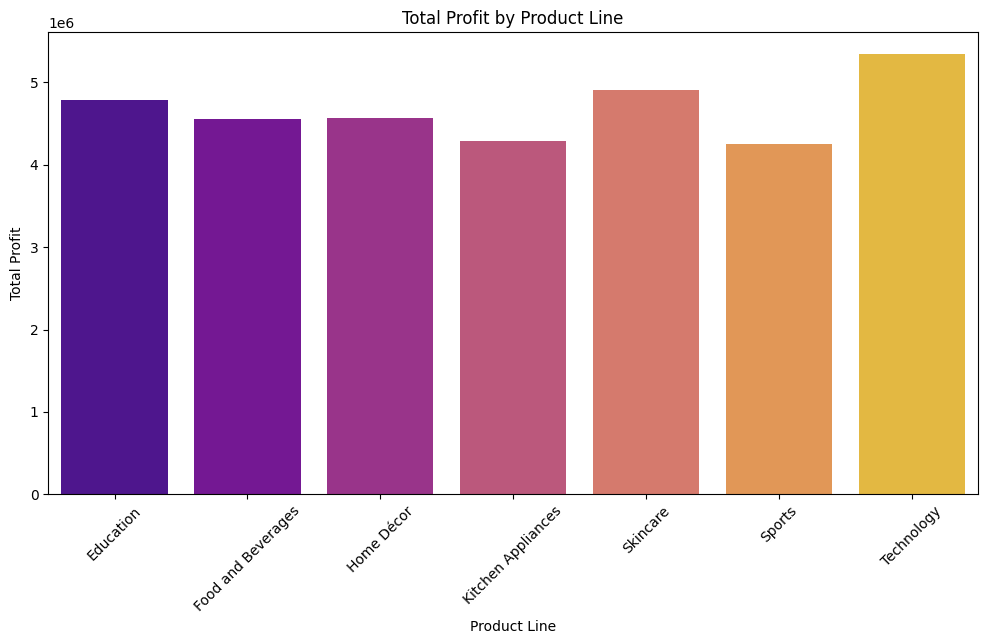

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Line', y='Total_Profit', data=product_performance, palette='plasma')
plt.title('Total Profit by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_7028\548431645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Line', y='Avg_Profit_Per_Order', data=product_performance, palette='coolwarm')


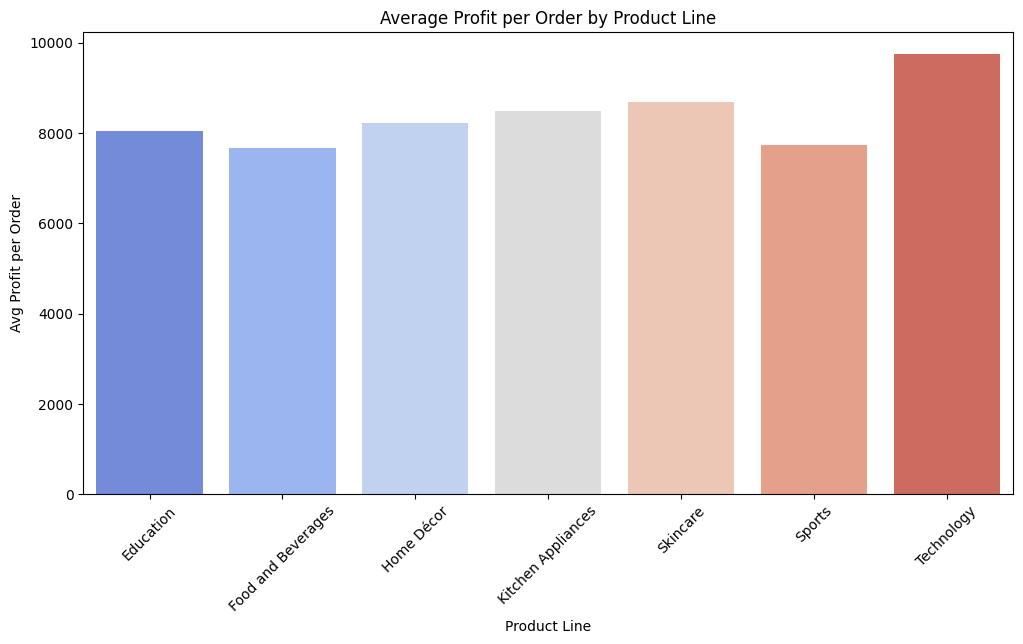

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Line', y='Avg_Profit_Per_Order', data=product_performance, palette='coolwarm')
plt.title('Average Profit per Order by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Avg Profit per Order')
plt.xticks(rotation=45)
plt.show()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_7028\1300017991.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Line', y='Order_Count', data=product_performance, palette='cividis')


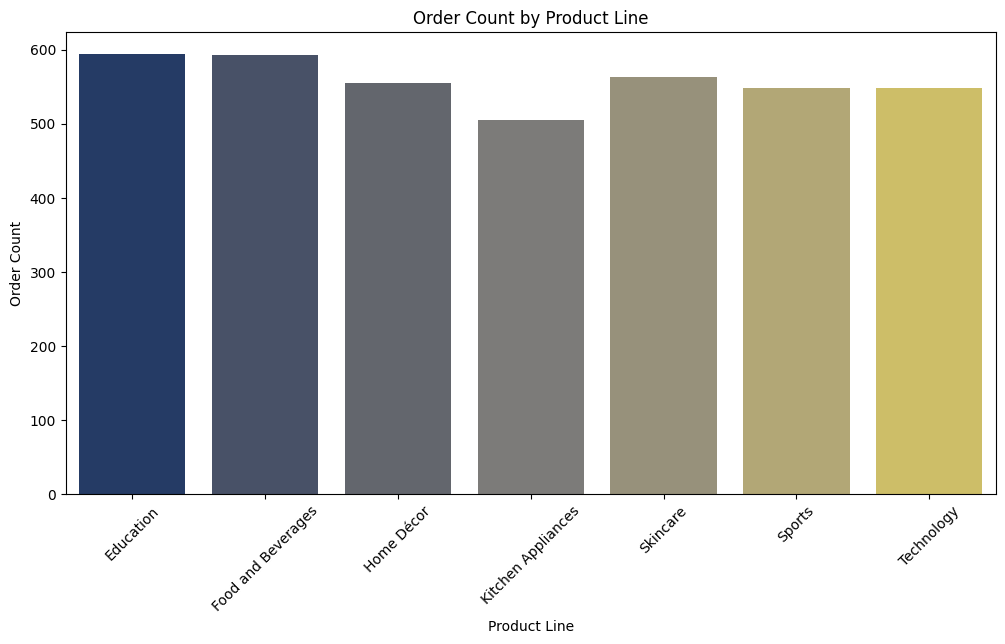

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Line', y='Order_Count', data=product_performance, palette='cividis')
plt.title('Order Count by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.show()

In [51]:
print(product_performance)

         Product Line  Total_Sales  Total_Profit  Avg_Profit_Per_Order  \
0           Education     65268164    4786797.33           8058.581364   
1  Food and Beverages     64745188    4550517.89           7673.723255   
2          Home Décor     62664553    4562096.76           8219.994162   
3  Kitchen Appliances     56767413    4293210.54           8501.407010   
4            Skincare     66369641    4903704.14           8694.510887   
5              Sports     58794407    4248296.02           7738.244117   
6          Technology     60981337    5340972.49           9746.300164   

   Order_Count  
0          594  
1          593  
2          555  
3          505  
4          564  
5          549  
6          548  


**<font size="6">5. Customer Segmentation </font>**

In [53]:
customer_segmentation = Df.groupby("Customer Type").agg(
    Total_Sales=("Total Sales", "sum"),
    Total_Profit=("Profit", "sum"),
    Avg_Profit_Per_Order=("Profit", "mean"),
    Order_Count=("Customer Type", "count")
).reset_index()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_7028\1039114083.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Type', y='Total_Sales', data=customer_segmentation, palette='viridis')


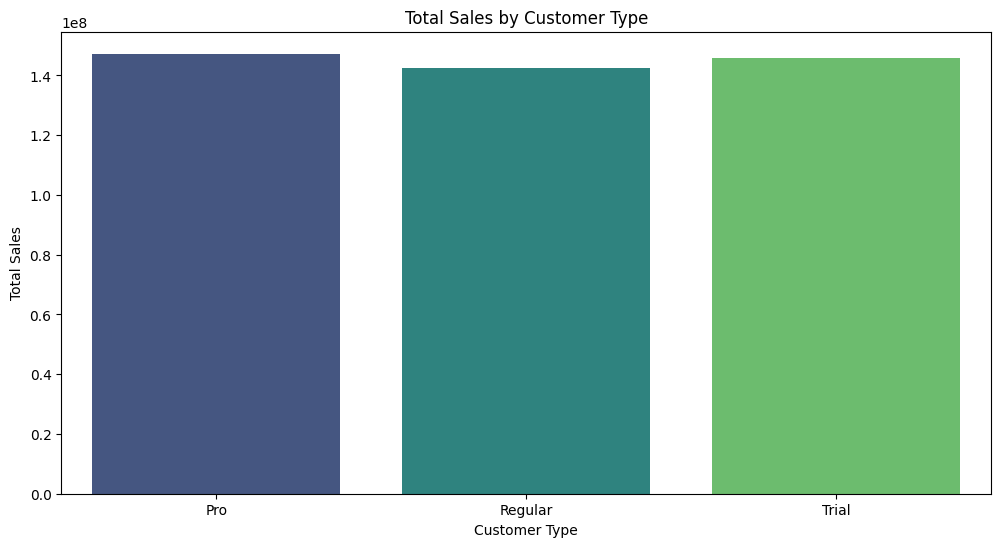

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Customer Type', y='Total_Sales', data=customer_segmentation, palette='viridis')
plt.title('Total Sales by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.show()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_7028\1330936997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Type', y='Total_Profit', data=customer_segmentation, palette='plasma')


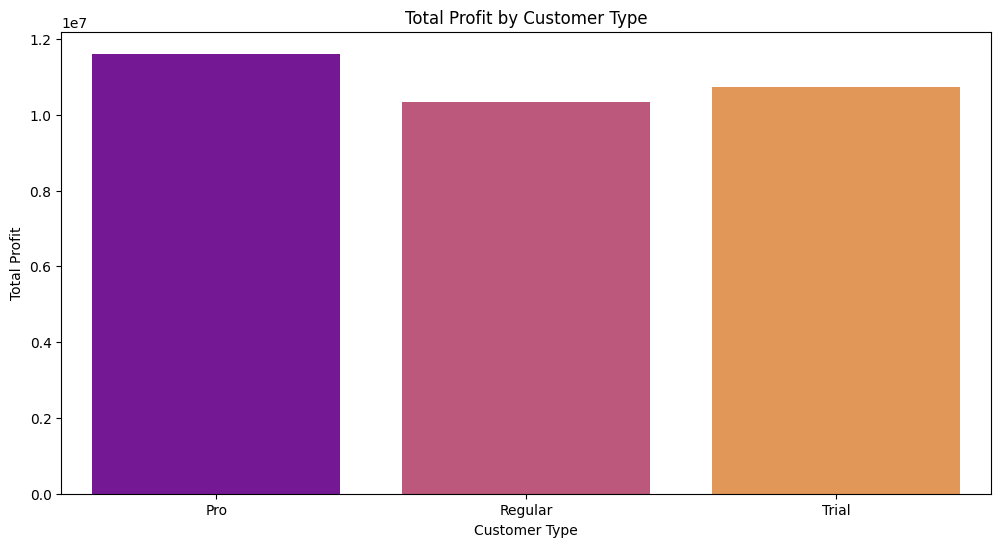

In [56]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Customer Type', y='Total_Profit', data=customer_segmentation, palette='plasma')
plt.title('Total Profit by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Profit')
plt.show()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_7028\25117915.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Type', y='Avg_Profit_Per_Order', data=customer_segmentation, palette='coolwarm')


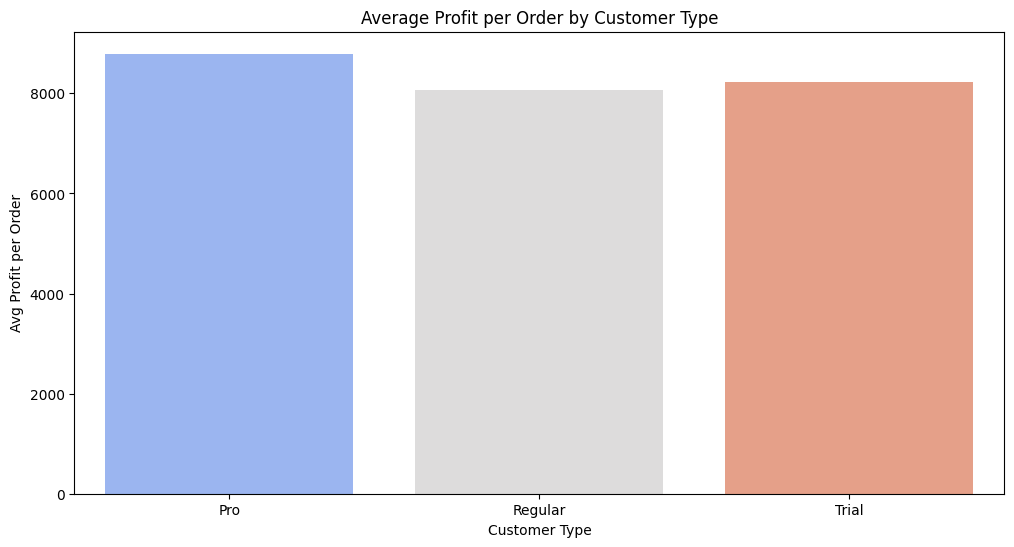

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Customer Type', y='Avg_Profit_Per_Order', data=customer_segmentation, palette='coolwarm')
plt.title('Average Profit per Order by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Avg Profit per Order')
plt.show()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_7028\1939953962.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Type', y='Order_Count', data=customer_segmentation, palette='cividis')


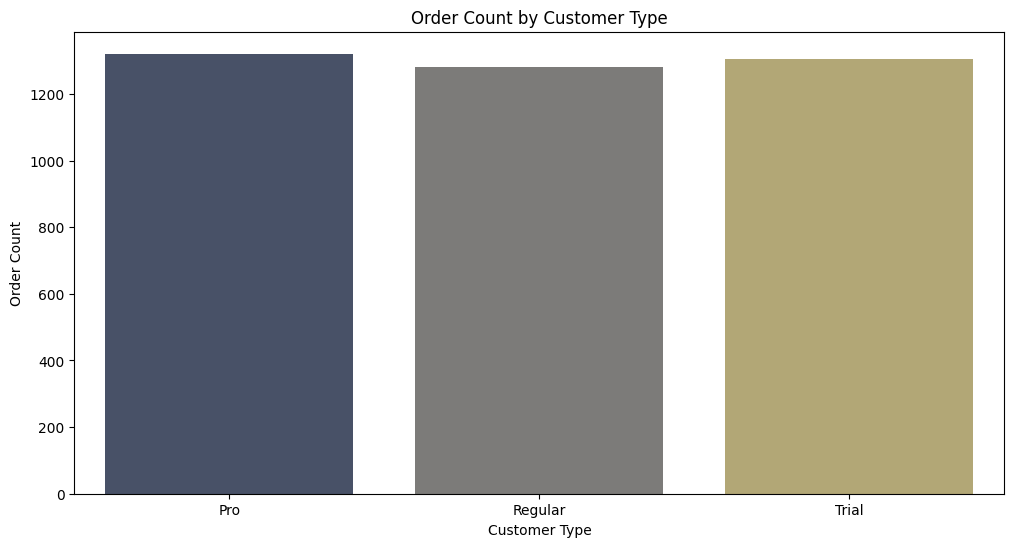

In [58]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Customer Type', y='Order_Count', data=customer_segmentation, palette='cividis')
plt.title('Order Count by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Order Count')
plt.show()

In [59]:
print(customer_segmentation)

  Customer Type  Total_Sales  Total_Profit  Avg_Profit_Per_Order  Order_Count
0           Pro    147255700   11612099.52           8790.385708         1321
1       Regular    142553677   10341161.29           8066.428463         1282
2         Trial    145781326   10732334.36           8224.011004         1305


**<font size="6">6. Profitability Analysis </font>**

In [70]:
profitability_analysis = Df.copy()
profitability_analysis['Profit Margin'] = (profitability_analysis['Profit'] / profitability_analysis['Total Sales']) * 100

In [71]:
loss_making_orders = profitability_analysis[profitability_analysis['Profit'] < 0]

In [73]:
profit_by_product = profitability_analysis.groupby("Product Line").agg(
    Total_Sales=("Total Sales", "sum"),
    Total_Profit=("Profit", "sum"),
    Avg_Profit_Per_Order=("Profit", "mean"),
    Profit_Margin=("Profit Margin", "mean"),
    Order_Count=("Product Line", "count")
).reset_index()

profit_by_region = profitability_analysis.groupby("Region").agg(
    Total_Sales=("Total Sales", "sum"),
    Total_Profit=("Profit", "sum"),
    Avg_Profit_Per_Order=("Profit", "mean"),
    Profit_Margin=("Profit Margin", "mean"),
    Order_Count=("Region", "count")
).reset_index()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_7028\3329650684.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Line', y='Profit_Margin', data=profit_by_product, palette='viridis')


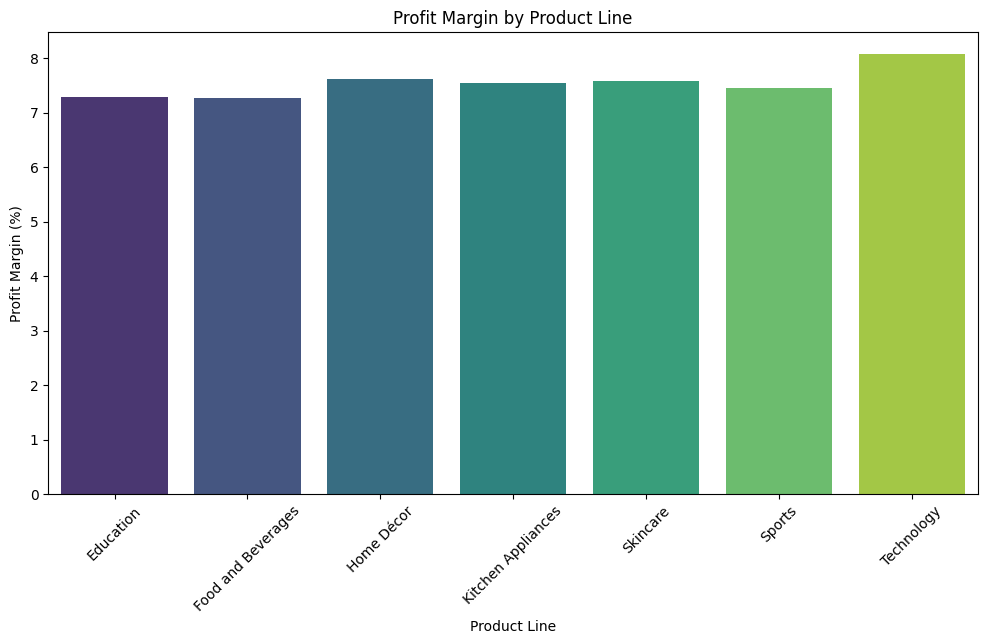

In [74]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Line', y='Profit_Margin', data=profit_by_product, palette='viridis')
plt.title('Profit Margin by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.show()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_7028\2107227376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit_Margin', data=profit_by_region, palette='plasma')


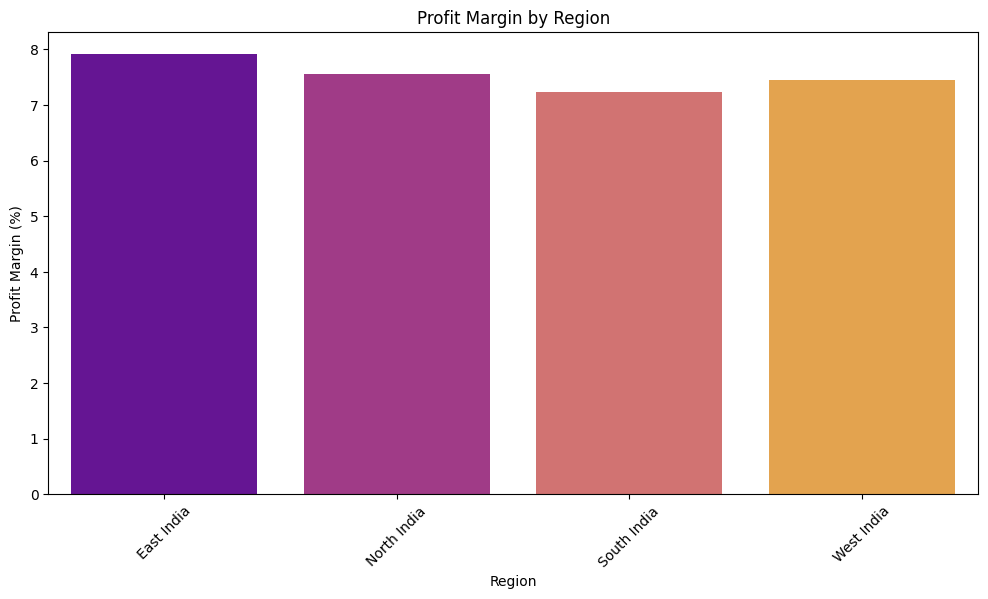

In [75]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Profit_Margin', data=profit_by_region, palette='plasma')
plt.title('Profit Margin by Region')
plt.xlabel('Region')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.show()

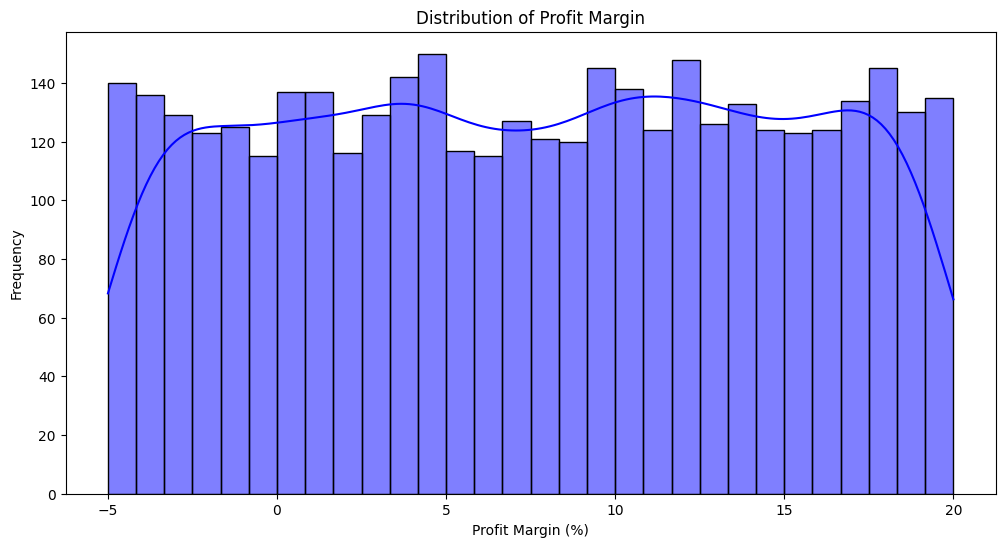

In [76]:
plt.figure(figsize=(12, 6))
sns.histplot(profitability_analysis['Profit Margin'], bins=30, kde=True, color='blue')
plt.title('Distribution of Profit Margin')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.show()

In [81]:
print("\nSummary of Loss-Making Orders:")
print(loss_making_orders[['Total Sales', 'Profit', 'Profit Margin']].head())


Summary of Loss-Making Orders:
   Total Sales    Profit  Profit Margin
1       327467 -13472.70      -4.114216
4        90864  -1659.36      -1.826202
5       264404  -3530.12      -1.335124
6         1690    -76.08      -4.501775
8       222561  -1542.50      -0.693068


In [82]:
print("\nProfitability by Product Line:")
print(profit_by_product)


Profitability by Product Line:
         Product Line  Total_Sales  Total_Profit  Avg_Profit_Per_Order  \
0           Education     65268164    4786797.33           8058.581364   
1  Food and Beverages     64745188    4550517.89           7673.723255   
2          Home Décor     62664553    4562096.76           8219.994162   
3  Kitchen Appliances     56767413    4293210.54           8501.407010   
4            Skincare     66369641    4903704.14           8694.510887   
5              Sports     58794407    4248296.02           7738.244117   
6          Technology     60981337    5340972.49           9746.300164   

   Profit_Margin  Order_Count  
0       7.286422          594  
1       7.274352          593  
2       7.629319          555  
3       7.544824          505  
4       7.579912          564  
5       7.455547          549  
6       8.075252          548  


In [83]:
print("\nProfitability by Region:")
print(profit_by_region)


Profitability by Region:
        Region  Total_Sales  Total_Profit  Avg_Profit_Per_Order  \
0   East India    103860452    8211613.66           8518.271432   
1  North India    118717232    8908385.40           8598.827606   
2  South India    110171278    8259954.79           8595.166275   
3   West India    102841741    7305641.32           7714.510370   

   Profit_Margin  Order_Count  
0       7.916383          964  
1       7.564604         1036  
2       7.243320          961  
3       7.445073          947  


**<font size="6">7. Payment Method Analysis </font>**

In [67]:
payment_method_analysis = Df.groupby("Payment Method").agg(
    Total_Sales=("Total Sales", "sum"),
    Total_Profit=("Profit", "sum"),
    Avg_Profit_Per_Order=("Profit", "mean"),
    Order_Count=("Payment Method", "count")
).reset_index()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_7028\2923622049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment Method', y='Total_Sales', data=profitability_analysis, palette='viridis')


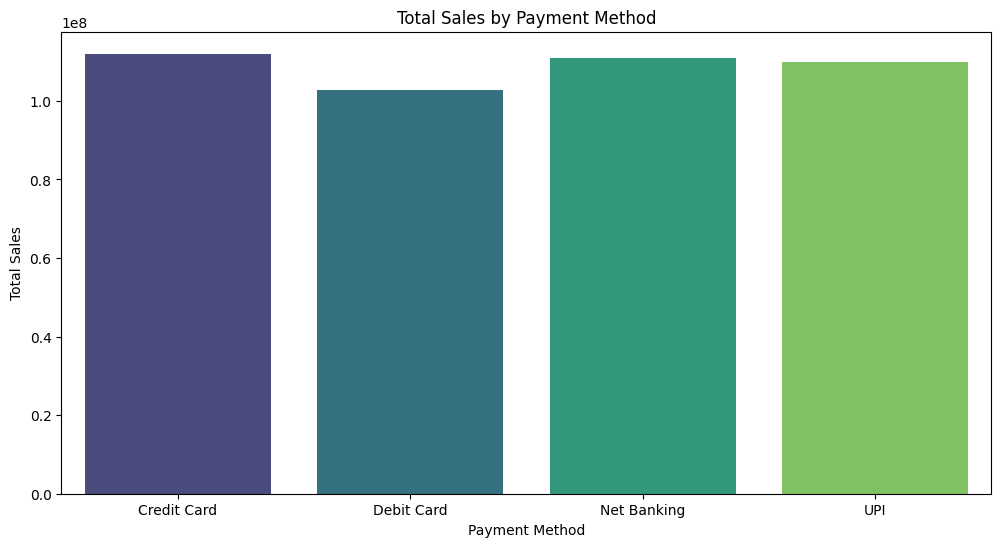

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Payment Method', y='Total_Sales', data=profitability_analysis, palette='viridis')
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.show()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_7028\1370774370.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment Method', y='Total_Profit', data=profitability_analysis, palette='plasma')


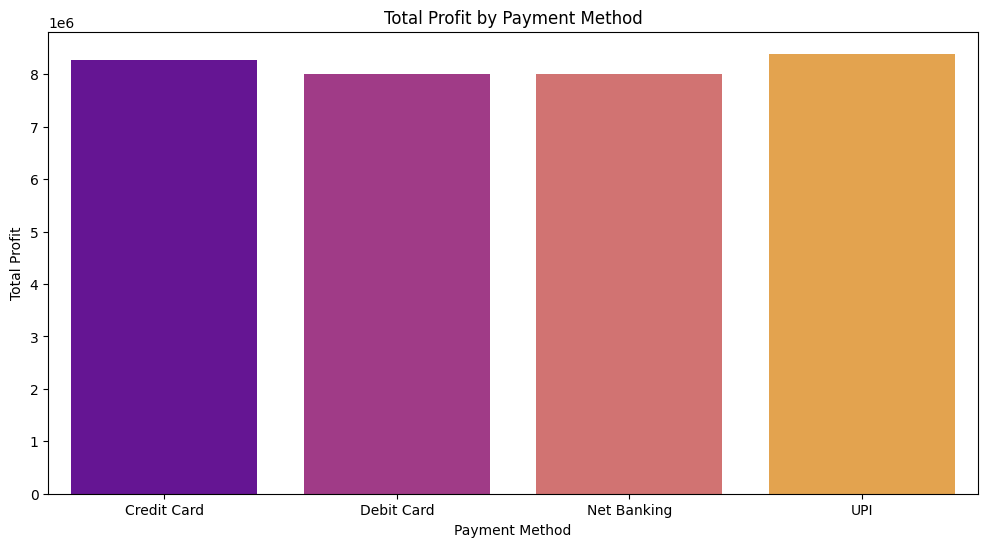

In [63]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Payment Method', y='Total_Profit', data=profitability_analysis, palette='plasma')
plt.title('Total Profit by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Profit')
plt.show()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_7028\3803502930.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment Method', y='Avg_Profit_Per_Order', data=profitability_analysis, palette='coolwarm')


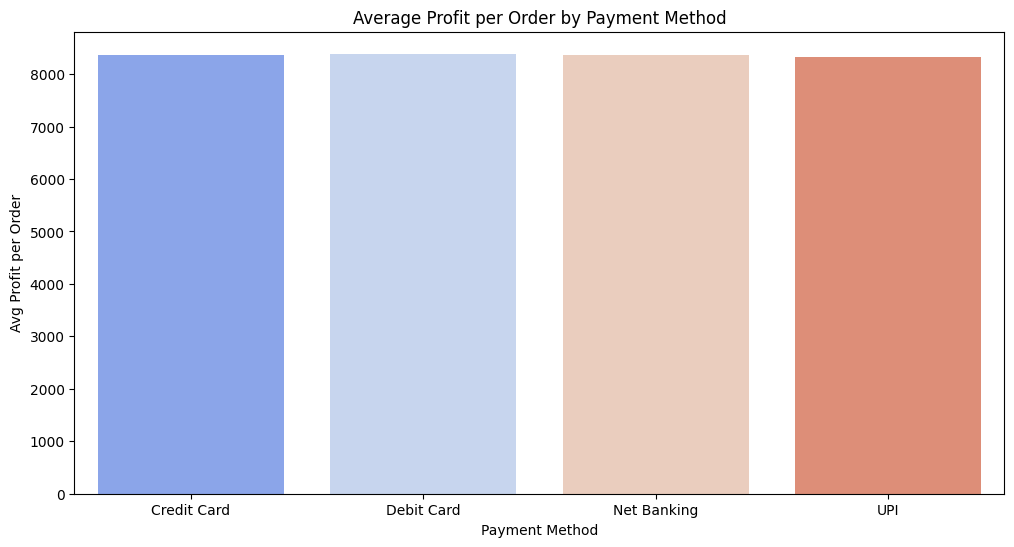

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Payment Method', y='Avg_Profit_Per_Order', data=profitability_analysis, palette='coolwarm')
plt.title('Average Profit per Order by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Avg Profit per Order')
plt.show()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_7028\2402244879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment Method', y='Order_Count', data=profitability_analysis, palette='cividis')


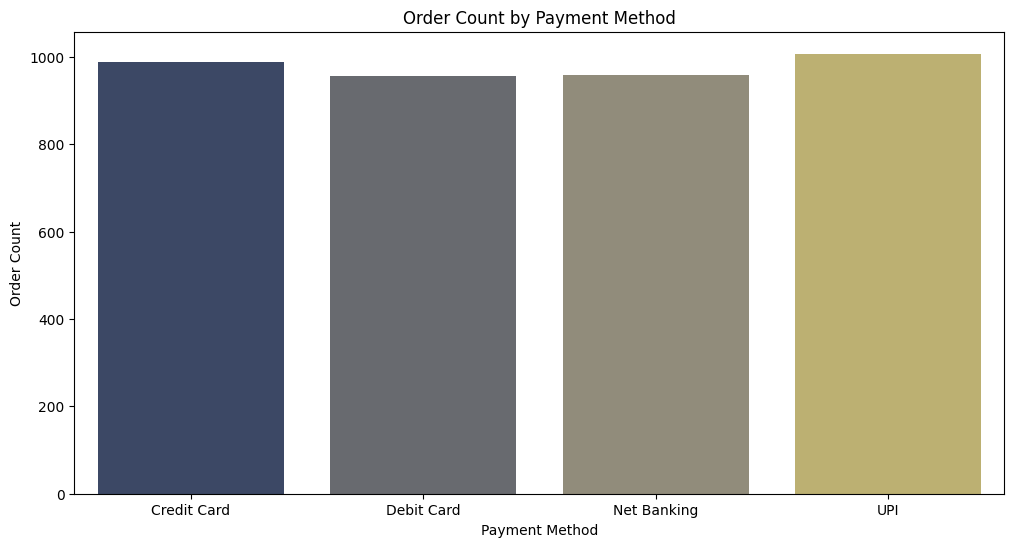

In [65]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Payment Method', y='Order_Count', data=profitability_analysis, palette='cividis')
plt.title('Order Count by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Order Count')
plt.show()

In [69]:
print(payment_method_analysis)

  Payment Method  Total_Sales  Total_Profit  Avg_Profit_Per_Order  Order_Count
0    Credit Card    112002793    8272027.06           8372.497024          988
1     Debit Card    102684100    8011136.68           8388.624796          955
2    Net Banking    110924009    8011404.84           8362.635532          958
3            UPI    109979801    8391026.59           8332.697706         1007


**<font size="6">8. Predictive Modeling </font>**

In [112]:
Df['Year'] = Df['Date of Order'].dt.year
Df['Month'] = Df['Date of Order'].dt.month
Df['Day'] = Df['Date of Order'].dt.day

In [113]:
features = ['Total Sales', 'Quantity', 'Unit Price', 'Year', 'Month', 'Day', 'Customer Type', 'Region', 'Product Line', 'Payment Method']
target = 'Profit'

X = Df[features]
y = Df[target]

In [114]:
categorical_features = ['Customer Type', 'Region', 'Product Line', 'Payment Method']
numeric_features = ['Total Sales', 'Quantity', 'Unit Price', 'Year', 'Month', 'Day']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

In [118]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Model Performance:\nMean Absolute Error: {mae_rf:.2f}\nMean Squared Error: {mse_rf:.2f}\nR² Score: {r2_rf:.2f}")

Random Forest Model Performance:
Mean Absolute Error: 7041.51
Mean Squared Error: 120652619.46
R² Score: 0.26


In [119]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_processed.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

C:\Users\Arnav\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [120]:
history = model.fit(X_train_processed, y_train, epochs=100, validation_data=(X_test_processed, y_test), verbose=1)

Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 237252864.0000 - mae: 9584.8525 - val_loss: 226249376.0000 - val_mae: 9259.2402
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 217273136.0000 - mae: 9021.8818 - val_loss: 130232832.0000 - val_mae: 7545.9663
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 124334240.0000 - mae: 7625.1167 - val_loss: 117418920.0000 - val_mae: 7326.5557
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 117648904.0000 - mae: 7342.6333 - val_loss: 116349000.0000 - val_mae: 7200.8867
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 114988864.0000 - mae: 7204.5430 - val_loss: 115100232.0000 - val_mae: 7101.4360
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 114863464.0000 - mae: 7110.3262 - val_loss: 115118272.0000 - val_mae: 7098.4668
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 114653440.0000 - mae: 7046.2510 - val_loss: 114911056.0000 - val_mae: 7086.8013
Epoch 8/100
98/98 ━━━━━━━━━

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111630640.0000 - mae: 6992.4360 - val_loss: 115017848.0000 - val_mae: 7069.3530
Epoch 49/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 112916048.0000 - mae: 6973.5186 - val_loss: 114862744.0000 - val_mae: 7062.7012
Epoch 50/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 116153952.0000 - mae: 7089.9956 - val_loss: 115898768.0000 - val_mae: 7083.1118
Epoch 51/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 115038952.0000 - mae: 7100.3726 - val_loss: 115279360.0000 - val_mae: 7071.4131
Epoch 52/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 113860904.0000 - mae: 7066.2183 - val_loss: 115686816.0000 - val_mae: 7080.0205
Epoch 53/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 109068576.0000 - mae: 6971.9707 - val_loss: 115152600.0000 - val_mae: 7066.7534
Epoch 54/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 113239872.0000 - mae: 7122.6367 - val_loss: 115367624.0000 - val_mae: 7070.8726
Epoch 55/100
98/98 ━━━━━━━━━━━━━━

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111810032.0000 - mae: 6961.8042 - val_loss: 114836304.0000 - val_mae: 7055.5645
Epoch 96/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 113041160.0000 - mae: 7003.8706 - val_loss: 115749504.0000 - val_mae: 7073.7915
Epoch 97/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 112054288.0000 - mae: 6993.4595 - val_loss: 115009496.0000 - val_mae: 7055.4360
Epoch 98/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 109298728.0000 - mae: 6983.0405 - val_loss: 114603712.0000 - val_mae: 7051.8540
Epoch 99/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 114364800.0000 - mae: 7164.5078 - val_loss: 114817368.0000 - val_mae: 7053.0645
Epoch 100/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 117639848.0000 - mae: 7210.7163 - val_loss: 115617984.0000 - val_mae: 7072.3301


In [121]:
y_pred_nn = model.predict(X_test_processed)
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network Model Performance:\nMean Absolute Error: {mae_nn:.2f}\nMean Squared Error: {mse_nn:.2f}\nR² Score: {r2_nn:.2f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Neural Network Model Performance:
Mean Absolute Error: 7072.33
Mean Squared Error: 115617990.55
R² Score: 0.30


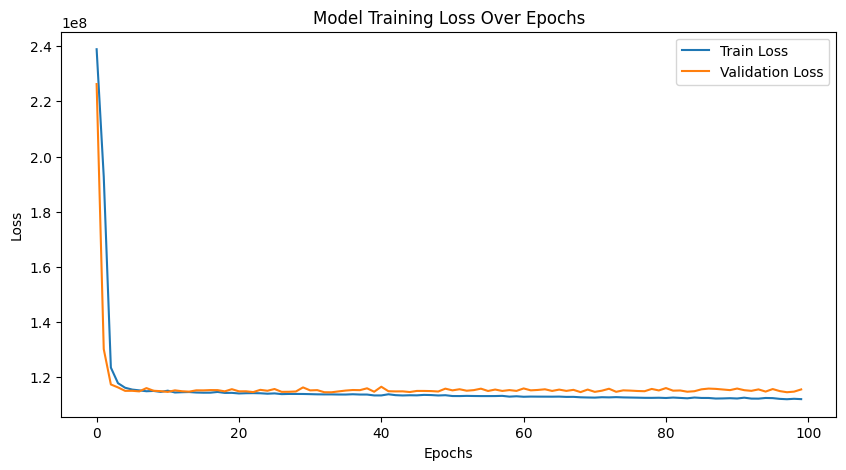

In [122]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [123]:
rf_model = rf_pipeline.named_steps['model']
feature_names = numeric_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

C:\Users\Arnav\AppData\Local\Temp\ipykernel_7028\3907158982.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='coolwarm')


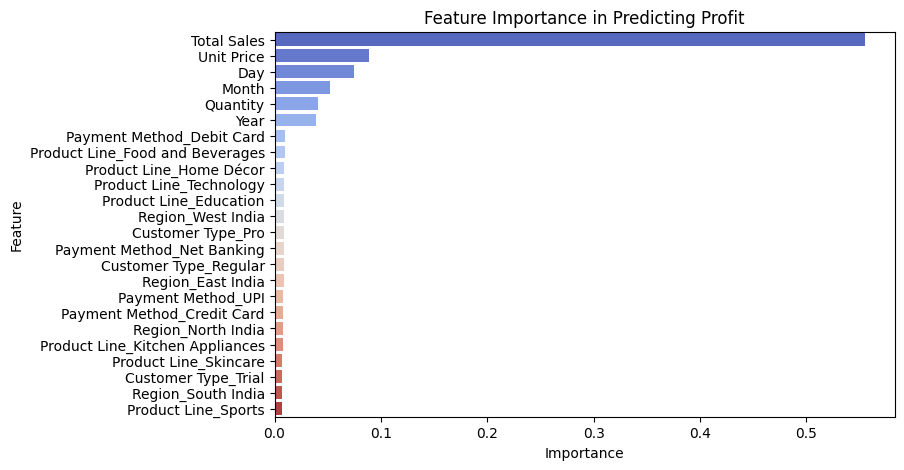

In [124]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='coolwarm')
plt.title('Feature Importance in Predicting Profit')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [125]:
print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
                            Feature  Importance
0                       Total Sales    0.555147
2                        Unit Price    0.088607
5                               Day    0.074427
4                             Month    0.051734
1                          Quantity    0.040745
3                              Year    0.039101
21        Payment Method_Debit Card    0.009863
14  Product Line_Food and Beverages    0.009445
15          Product Line_Home Décor    0.009179
19          Product Line_Technology    0.009126
13           Product Line_Education    0.009036
12                Region_West India    0.008912
6                 Customer Type_Pro    0.008903
22       Payment Method_Net Banking    0.008855
7             Customer Type_Regular    0.008771
9                 Region_East India    0.008436
23               Payment Method_UPI    0.008306
20       Payment Method_Credit Card    0.007957
10               Region_North India    0.007628
16  Product Line_K